In [1]:
import numpy as np               # el módulo numpy se asocia con alias np
import time                      # módulo de gestión del tiempo
import cv2                       # módulo de OpenCV
# las siguientes librerías permiten mostrar imágenes en el cuaderno
import matplotlib                # módulo de visualización
import matplotlib.pyplot as plt  # el módulo matplotlib.pyplot con alias plt
from IPython.display import clear_output, Image, display, HTML  
#import tools_creaVideo as crea   # módulo para generar imágenes virtuales
import ipywidgets as widgets     # funcionalidad de interacción con las gráficas
from matplotlib import rcParams
import os
import random

In [2]:
def predict(X, W1, b1, W2, b2):
    Y = sigmoid(np.dot(W2,sigmoid(np.dot(W1,X)+b1))+b2)
    predict = Y > 0.5
    return predict
#Sigmoid activation
def sigmoid(z):
    sigmoid = 1/(1+np.exp(-z))
    return sigmoid

In [4]:
W1 = np.load('data_NN/W1.npy')
b1 = np.load('data_NN/b1.npy')
W2 = np.load('data_NN/W2.npy')
b2 = np.load('data_NN/b2.npy')

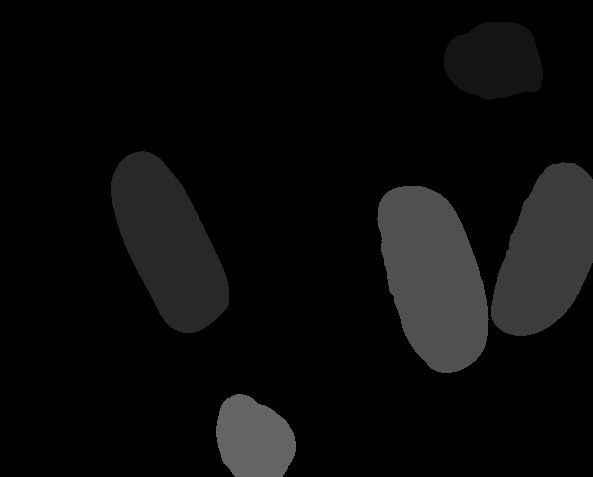

In [10]:
img_test = cv2.imread('img_NN/image_test1.png')
img_gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

Image(cv2.imencode('.jpg', img_gray*20)[1])

In [6]:
def NNClassifier(img):

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    

    alto, ancho = img_gray.shape
    x_0 = np.ones(10)*1000
    y_0 = np.ones(10)*1000
    x_f = np.zeros(10)
    y_f = np.zeros(10)
    n_max=0
    
    img_color=np.zeros((alto,ancho,3),dtype='uint8')
    colores=cv2.imread("color30.bmp")
    
    #find the frames
    for y in range(alto):
        for x in range(ancho):
            if img_gray[y,x] != 0:
                #print( str(img_gray[y,x]))
                n = img_gray[y,x]-1
                if n+1 > n_max:
                    n_max = n+1
                if  y < y_0[n]:
                    y_0[n] = y
                if  x < x_0[n]:
                    x_0[n] = x
                if  y > y_f[n]:
                    y_f[n] = y
                if  x > x_f[n]:
                    x_f[n] = x
                
                img_color[y,x]=colores[n+1,0]

    for i in range(n_max):
        if (y_f[i]-y_0[i]) > 10:
            
            #binary img of the item i
            piece = (img_gray[int(y_0[i]):int(y_f[i]),int(x_0[i]):int(x_f[i])] == i+1)*1
            #normalize the img
            img_igualada = igualar_img(piece,int(220-(y_f[i]-y_0[i])),int(220-(x_f[i]-x_0[i])))
            #unroll and predict
            x = np.reshape(img_igualada,-1)
            X = x.reshape(48400,1)
            prediction=int(predict(X,W1,b1,W2,b2))

            #put text
            text = (1-int(prediction))*'garb'+int(prediction)*'hab'
            font = cv2.FONT_HERSHEY_SIMPLEX
            fontScale = 0.7
            fontColor = [255,255,255]
            lineType = int(fontScale/0.7)+1
            bottomLeftCornerOfText = (int((x_0[i]+x_f[i])/2-30*fontScale),int((y_0[i]+y_f[i])/2+10*fontScale))
            cv2.putText (img_color, text ,bottomLeftCornerOfText, font, fontScale,fontColor,lineType)


    return img_color

In [7]:
def igualar_img (img,delta_h,delta_w):
    alto,ancho =img.shape
    img_grande=np.zeros((alto+delta_h,ancho+delta_w),dtype=img.dtype)
    img_grande[int(delta_h/2):(alto+int(delta_h/2)),int(delta_w/2):(ancho+int(delta_w/2))]=img[:,:]
    return img_grande

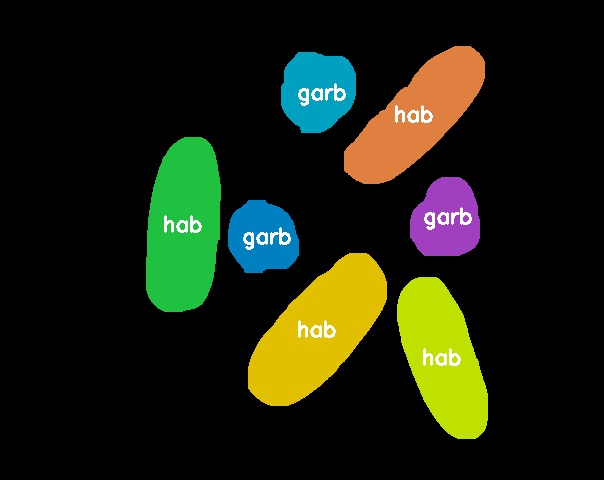

In [9]:
Image(cv2.imencode('.jpg', NNClassifier(cv2.imread('img_NN/image_test7.png')))[1])